# <center> PROFIT OF A COMPANY PREDICTION

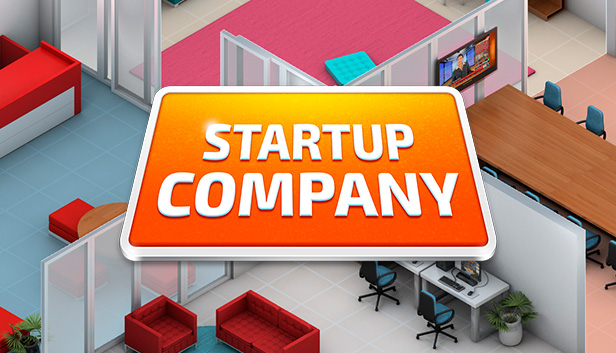

### This project determine the expected profit on startup of a company.

#### Import the Dependencies

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
import regex as re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Performing Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.shape

(50, 5)

In [5]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
df.isnull().mean()*100

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

## Univarite analysis

### HISTOGRAM

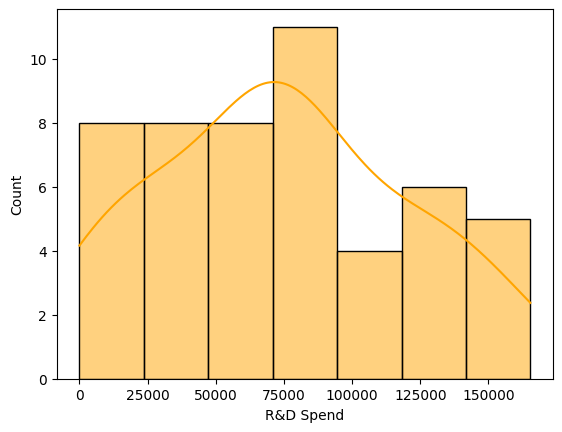

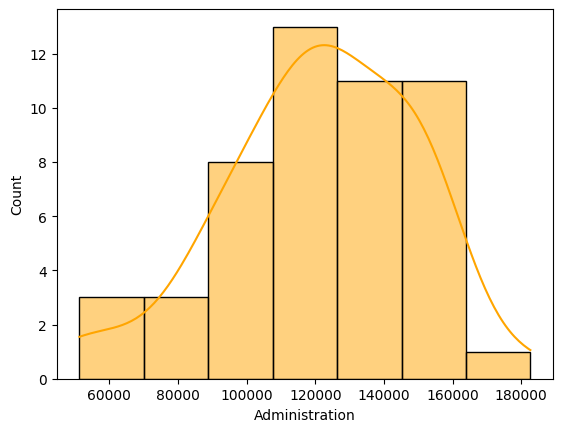

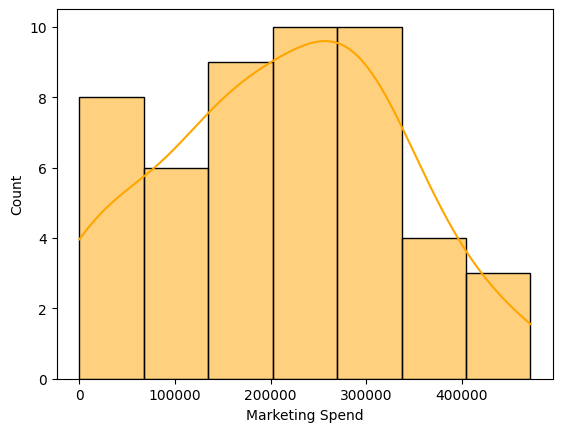

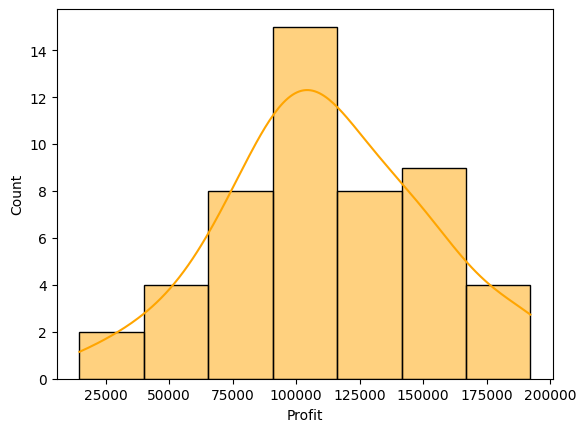

In [7]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.histplot(df, x=df[column], kde=True, color="orange")
        plt.show()
        

### KDE PLOT

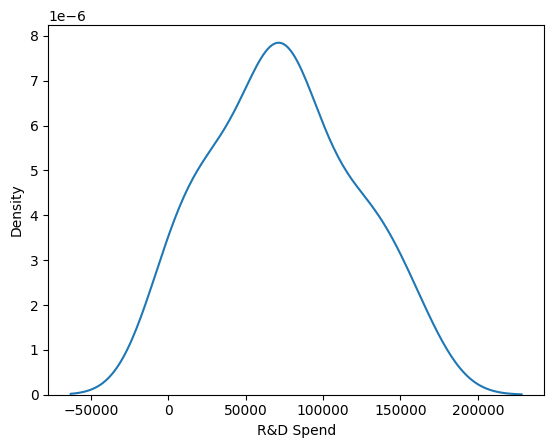

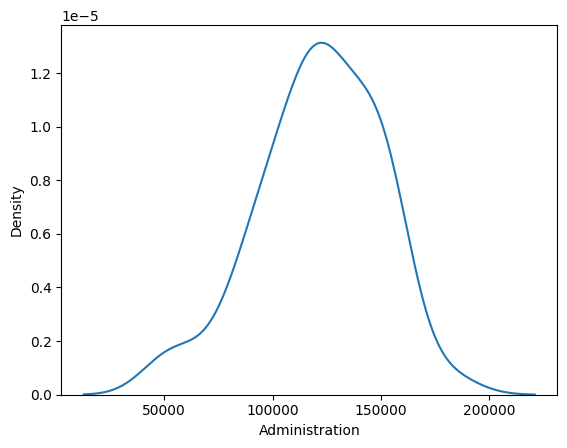

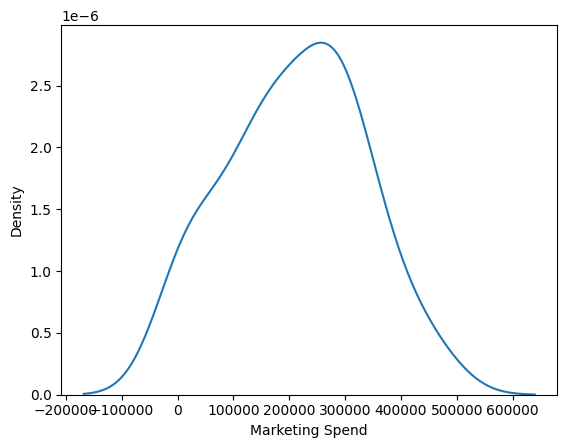

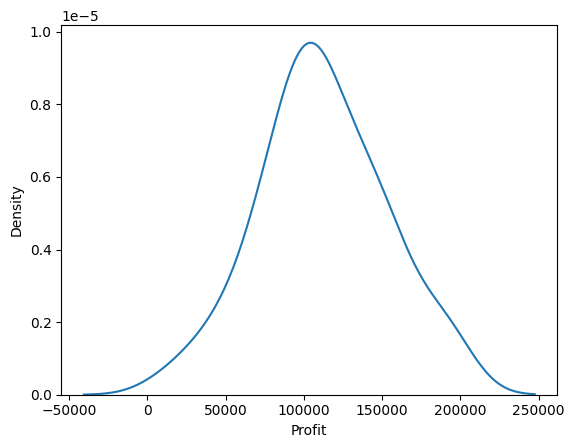

In [8]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.kdeplot(df[i])
    plt.show()

### BOX PLOT

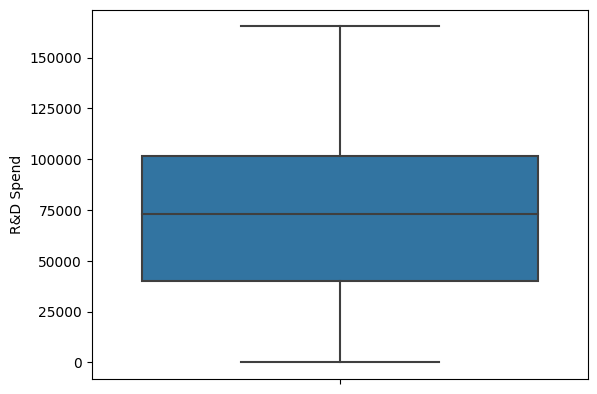

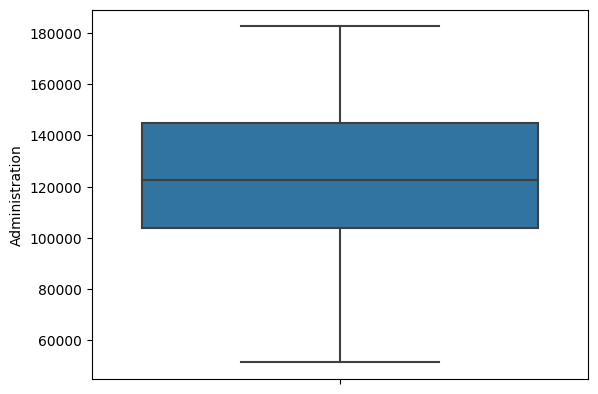

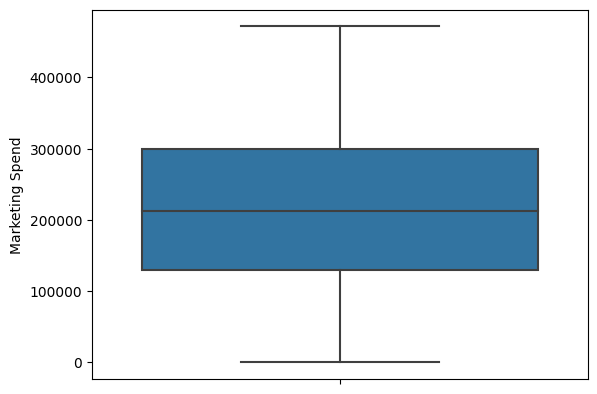

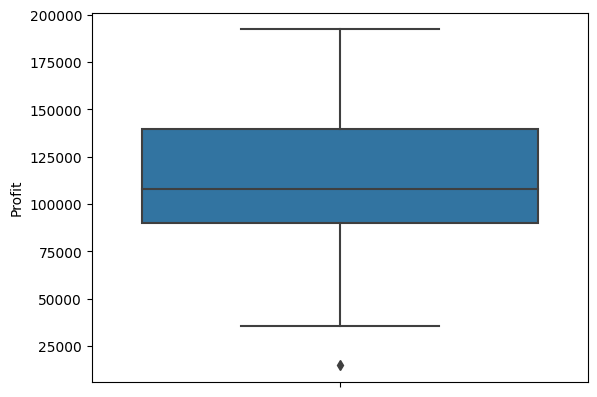

In [9]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i])
    plt.show()

## Multivariate analysis
### Line plot

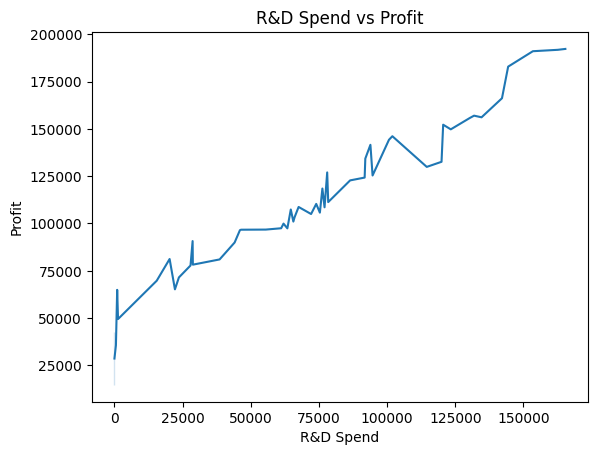

In [10]:
sns.lineplot('R&D Spend','Profit',data=df)
plt.title("R&D Spend vs Profit")
plt.show()

### Pie chart

In [11]:
state_rdspend=df.groupby(['State'])['R&D Spend'].sum()

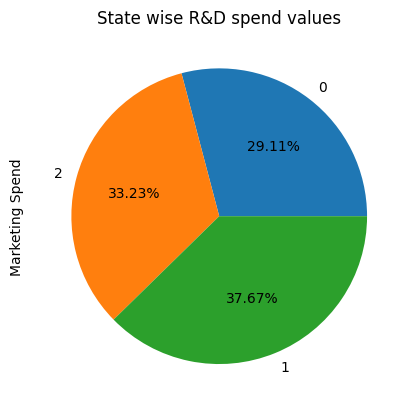

In [41]:
state_rdspend.sort_values(ascending=True).plot.pie(autopct='%.2f%%');
plt.title("State wise R&D spend values");

In [38]:
state_rdspend=df.groupby(['State'])['Marketing Spend'].sum()

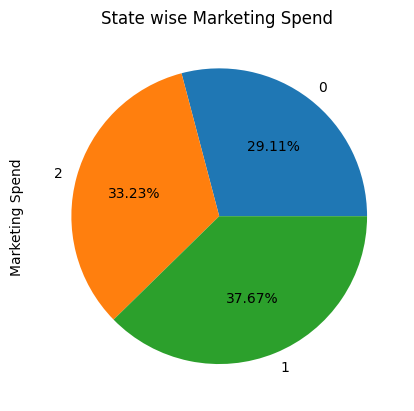

In [40]:
state_rdspend.sort_values(ascending=True).plot.pie(autopct='%.2f%%');
plt.title("State wise Marketing Spend ");

In [13]:
state_profit=df.groupby(['State'])['Profit'].sum()

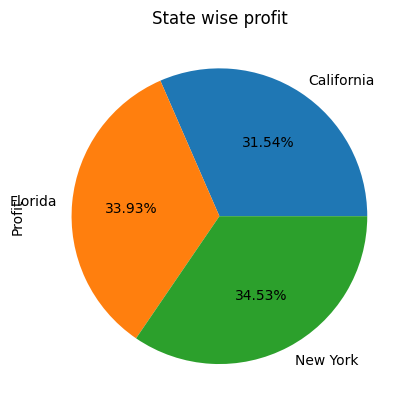

In [42]:
state_profit.sort_values(ascending=True).plot.pie(autopct='%.2f%%');
plt.title("State wise profit");

### Set the outliers

In [15]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL
    

In [16]:
for i in df.columns:
    if df[i].dtype != 'object':
        UL,LL= outlier_limit(df[i])        
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])
 

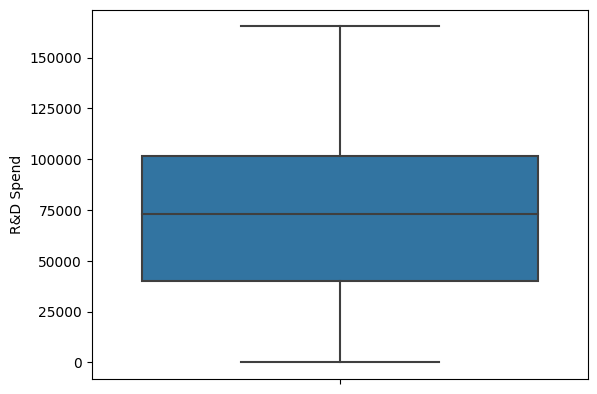

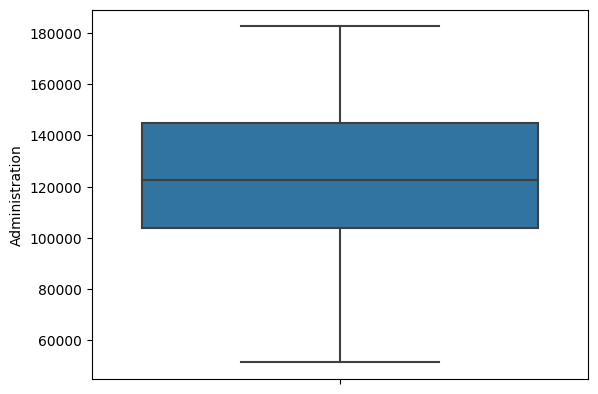

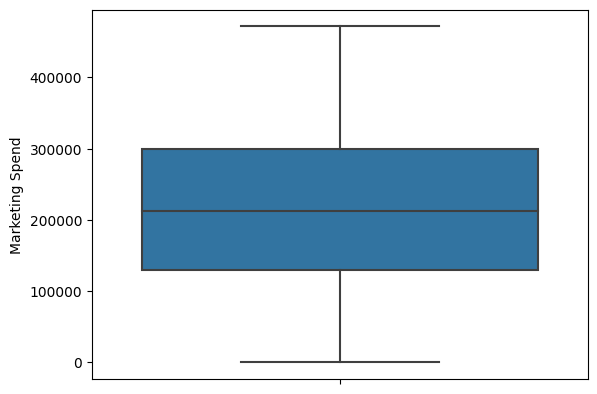

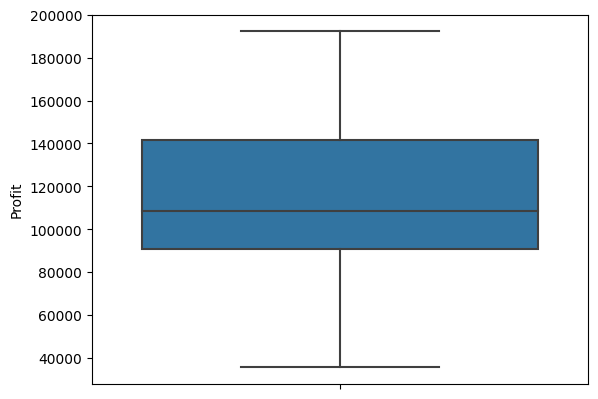

In [17]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i])
        plt.show();

In [18]:
df.dropna(inplace=True)

In [19]:
le=LabelEncoder()

In [20]:
df["State"]=le.fit_transform(df.State)

In [21]:
df.sample(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
5,131876.90,99814.71,362861.36,2,156991.12
12,93863.75,127320.38,249839.44,1,141585.52
31,61136.38,152701.92,88218.23,2,97483.56
32,63408.86,129219.61,46085.25,0,97427.84
24,77044.01,99281.34,140574.81,2,108552.04
19,86419.70,153514.11,0.00,2,122776.86
8,120542.52,148718.95,311613.29,2,152211.77
26,75328.87,144135.98,134050.07,1,105733.54
4,142107.34,91391.77,366168.42,1,166187.94
10,101913.08,110594.11,229160.95,1,146121.95


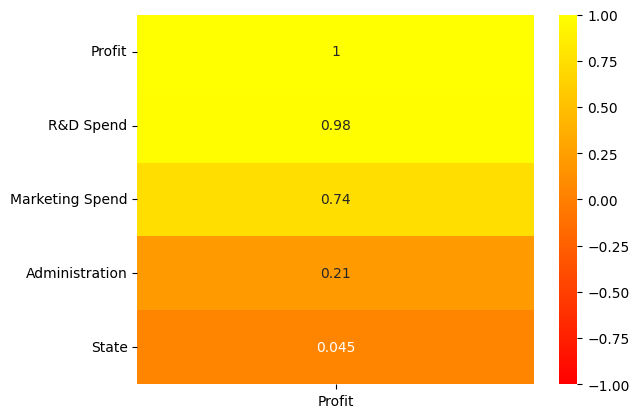

In [22]:
sns.heatmap(df.corr()[["Profit"]].sort_values(by="Profit",ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

In [23]:
x=df[['Marketing Spend','R&D Spend']].values

In [24]:
y=df[['Profit']].values

## Model Buliding Using Cross Validation

In [25]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(), 
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [26]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  7634.083409062134
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  7634.083407635892
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  7634.083409031899
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  41243.5249614293
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  15517.657708023364
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  15518.831183497905
***********************************************************

### Lasso Regressor has lowest RMSE value 

### Feature Scaling

In [27]:
sc = StandardScaler()

In [28]:
x=sc.fit_transform(x)

#### Splitting into training and testing


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)

In [30]:
model= Lasso()

In [31]:
model.fit(x_train, y_train)

Lasso()

In [32]:
training_score = model.score(x_train, y_train)
training_score

0.9609742752221928

In [33]:
testing_score = model.score(x_test, y_test)
testing_score

0.952889269447255

In [34]:
y_pred = model.predict(x)

In [35]:
output = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
output.head()

,ACTUAL,PREDICTED
0,192261.83,192785.222769
1,191792.06,189783.194288
2,191050.39,181492.700681
3,182901.99,173606.609641
4,166187.94,171312.459590


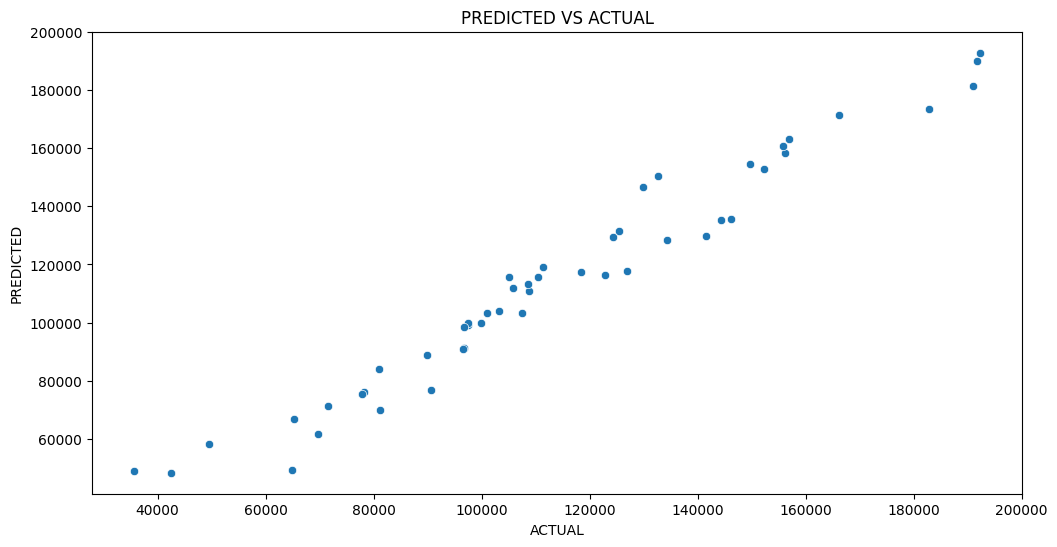

In [36]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL")
sns.scatterplot(data=output, x="ACTUAL", y = "PREDICTED");